# Laporan Proyek Machine Learning - Tugas Akhir

Nama : M Mahfudl Awaludin <br>
Nim : 210401010058

## Domain Proyek

Pemberian makanan di sekolah telah diakui sebagai intervensi penting untuk meningkatkan kesehatan dan pendidikan anak-anak di seluruh dunia. Di Indonesia, meskipun telah terjadi peningkatan ekonomi, masih terdapat tantangan signifikan terkait akses pangan dan gizi, terutama di kalangan anak-anak usia sekolah. Menurut data dari World Food Programme (WFP), lebih dari 23 juta orang di Indonesia tidak dapat memenuhi kebutuhan diet mereka, dan lebih dari 20% anak di bawah usia 5 tahun mengalami stunting akibat malnutrisi (WFP.org).

Program pemberian makanan di sekolah tidak hanya berfungsi sebagai jaring pengaman sosial tetapi juga berkontribusi pada peningkatan kehadiran dan prestasi belajar siswa (Bundy et al., 2018). Namun, implementasi program ini memerlukan pemahaman mendalam tentang kebutuhan gizi dan distribusi sumber daya yang efisien (Alderman & Bundy, 2012). Oleh karena itu, prediksi kebutuhan makanan berbasis sekolah (MBG) di Indonesia menjadi krusial untuk memastikan setiap anak mendapatkan asupan gizi yang memadai selama proses belajar.

**Referensi**

- Alderman, H., & Bundy, D. (2012). School Feeding Programs and Development: Are We Framing the Question Correctly? World Bank.

- Bundy, D. A. P., et al. (2018). Rethinking School Feeding: Social Safety Nets, Child Development, and the Education Sector. World Bank Publications.

- World Food Programme (WFP). (n.d.). Indonesia Country Overview. Retrieved from https://www.wfp.org


### Business Understanding

**Problem Statements**
1. Bagaimana cara memprediksi jumlah anak yang menerima program pemberian makanan di sekolah berdasarkan faktor ekonomi dan geografis?

2. Faktor-faktor apa saja yang paling mempengaruhi jumlah penerima manfaat dalam program pemberian makanan di sekolah?

3. Bagaimana meningkatkan akurasi prediksi jumlah anak yang menerima makanan di sekolah dengan menggunakan model machine learning?

4. Bagaimana memastikan bahwa model yang digunakan dapat diterapkan untuk melakukan prediksi di negara tertentu, seperti Indonesia?

5. Bagaimana optimasi parameter dalam model machine learning dapat meningkatkan kinerja prediksi dan memberikan wawasan yang lebih akurat?

**Goals**

1. Mengembangkan model prediktif yang mampu memperkirakan jumlah anak yang menerima makanan di sekolah dengan tingkat akurasi yang tinggi.

2. Mengidentifikasi faktor-faktor utama yang berpengaruh terhadap distribusi makanan di sekolah-sekolah.

3. Menggunakan metode machine learning untuk meningkatkan efisiensi dalam memprediksi kebutuhan makanan di sekolah.

4. Menguji dan menerapkan model prediksi pada data Indonesia untuk memastikan bahwa hasil prediksi dapat digunakan dalam pengambilan keputusan.

5. Melakukan tuning parameter model untuk mengoptimalkan kinerja prediksi dan meminimalkan kesalahan estimasi.

**Solution Statements**

1. Menggunakan algoritma Random Forest dan XGBoost untuk membangun model prediksi kebutuhan makanan di sekolah.

2. Melakukan hyperparameter tuning menggunakan teknik GridSearchCV untuk meningkatkan akurasi prediksi model.

3. Menggunakan analisis clustering untuk mengelompokkan sekolah-sekolah berdasarkan faktor ekonomi dan geografis guna optimalisasi distribusi makanan.

4. Menggunakan evaluasi model dengan metrik seperti Mean Absolute Error (MAE), Root Mean Squared Error (RMSE), dan R² Score untuk mengukur efektivitas prediksi.

Dengan pendekatan ini, diharapkan program pemberian makanan di sekolah dapat berjalan lebih efektif dan efisien, serta berkontribusi pada peningkatan kesehatan dan prestasi akademik siswa di Indonesia.

## Data Understanding

Dataset yang digunakan dalam proyek ini diperoleh dari laporan World Food Programme dengan judul State of School Feeding Worldwide 2022 yang dapat diakses melalui tautan berikut: https://www.wfp.org/publications/state-school-feeding-worldwide-2022.

**Deskripsi Variabel dalam Dataset**
- Country: Nama negara dalam dataset.
- Income level: Kategori tingkat pendapatan negara (low, lower-middle, upper-middle, high income).
- Region: Wilayah geografis tempat negara tersebut berada.
- Children enrolled in primary school 2022: Jumlah anak yang terdaftar di sekolah dasar pada tahun 2022.
- Number of children receiving school feeding 2022: Jumlah anak yang menerima makanan di sekolah pada tahun 2022.
- Primary school children receiving school feeding 2022: Jumlah anak sekolah dasar yang menerima makanan di sekolah pada tahun 2022.
- Primary school children coverage: Persentase cakupan program pemberian makanan di sekolah dasar.
- School Feeding Expenditures, Total, USD: Total pengeluaran untuk program pemberian makanan di sekolah dalam USD.
- National budget expenditure, USD: Total pengeluaran anggaran nasional dalam USD.

In [1]:
#mengimport library yang dibutuhkan
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb  # Ensure XGBoost is imported correctly
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [2]:
#Data Loading
# import file exel
file_path = '/content/state-school-feeding-worldwide-2022.xlsx'

# Membaca file Excel menggunakan pd.read_excel
df = pd.read_excel(file_path)
df

,Country,ISO Code,Income level,Region,Number of children receiving school feeding 2022,Data source 2022,Children enrolled in primary school 2022,Primary school children receiving school feeding 2022,Primary school children coverage,"School Feeding Expenditures, Total, USD","National budget expenditure, USD"
0,Afghanistan,AFG,Low,South Asia,1341812.0,est,6777785.0,1341812.0,0.197972,NaN,NaN
1,Albania,ALB,Upper middle,Europe & Central Asia,99041.0,est,162170.0,99041.0,0.610723,NaN,NaN
2,Algeria,DZA,Upper middle,Middle East & North Africa,39632.0,WFP ACR,4852322.0,39632.0,0.008168,NaN,NaN
3,Andorra,AND,High,Europe & Central Asia,1334.0,GCNF2021,4246.0,564.0,0.132831,1045510.25,1045510.25
4,Angola,AGO,Lower middle,Sub-Saharan Africa,1516133.0,AUSSF,5620915.0,1516133.0,0.269731,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
175,Venezuela (Bolivarian Republic of),VEN,Upper middle,Latin America & Caribbean,1904346.0,est,3285299.0,1904346.0,0.579657,NaN,NaN
176,Yemen,YEM,Low,Middle East & North Africa,680000.0,WFP ACR,3900134.0,680000.0,0.174353,NaN,NaN
177,Zambia,ZMB,Lower middle,Sub-Saharan Africa,2075631.0,GCNF2021,3284841.0,1871913.0,0.569864,7716931.00,2016931.00
178,Zimbabwe,ZWE,Lower middle,Sub-Saharan Africa,2489909.0,GCNF2021,2869735.0,1830779.0,0.637961,2763190.00,2763190.00


In [3]:
# Menampilkan 5 baris pertama untuk melihat struktur data
df.head()

,Country,ISO Code,Income level,Region,Number of children receiving school feeding 2022,Data source 2022,Children enrolled in primary school 2022,Primary school children receiving school feeding 2022,Primary school children coverage,"School Feeding Expenditures, Total, USD","National budget expenditure, USD"
0,Afghanistan,AFG,Low,South Asia,1341812.0,est,6777785.0,1341812.0,0.197972,NaN,NaN
1,Albania,ALB,Upper middle,Europe & Central Asia,99041.0,est,162170.0,99041.0,0.610723,NaN,NaN
2,Algeria,DZA,Upper middle,Middle East & North Africa,39632.0,WFP ACR,4852322.0,39632.0,0.008168,NaN,NaN
3,Andorra,AND,High,Europe & Central Asia,1334.0,GCNF2021,4246.0,564.0,0.132831,1045510.25,1045510.25
4,Angola,AGO,Lower middle,Sub-Saharan Africa,1516133.0,AUSSF,5620915.0,1516133.0,0.269731,NaN,NaN


Exploratory Data Analysis - Deskripsi Variabel

In [4]:
# Deskripsi Variabel
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 11 columns):
 #   Column                                                 Non-Null Count  Dtype  
---  ------                                                 --------------  -----  
 0   Country                                                180 non-null    object 
 1   ISO Code                                               180 non-null    object 
 2   Income level                                           180 non-null    object 
 3   Region                                                 180 non-null    object 
 4   Number of children receiving school feeding 2022       174 non-null    float64
 5   Data source 2022                                       174 non-null    object 
 6   Children enrolled in primary school 2022               172 non-null    float64
 7   Primary school children receiving school feeding 2022  174 non-null    float64
 8   Primary school children coverage                  

In [5]:
df.describe()

,Number of children receiving school feeding 2022,Children enrolled in primary school 2022,Primary school children receiving school feeding 2022,Primary school children coverage,"School Feeding Expenditures, Total, USD","National budget expenditure, USD"
count,1.740000e+02,1.720000e+02,1.740000e+02,172.000000,9.900000e+01,9.600000e+01
mean,2.400239e+06,4.131711e+06,1.687938e+06,0.560121,3.561466e+08,3.634812e+08
std,9.349682e+06,1.297842e+07,5.981368e+06,0.443511,1.905513e+09,1.934866e+09
min,0.000000e+00,1.475000e+03,0.000000e+00,0.000000,4.112298e+04,4.000000e+04
25%,9.698525e+04,1.582282e+05,7.084475e+04,0.174280,3.902645e+06,1.707423e+06
50%,3.515720e+05,7.924035e+05,2.768110e+05,0.541713,1.450780e+07,9.354304e+06
75%,1.387129e+06,3.284956e+06,1.083476e+06,0.849493,6.643953e+07,6.632049e+07
max,1.060000e+08,1.220000e+08,6.750000e+07,1.712542,1.820000e+10,1.820000e+10


In [6]:
# Mengecek apakah ada data untuk Indonesia
df[df["Country"] == "Indonesia"]

,Country,ISO Code,Income level,Region,Number of children receiving school feeding 2022,Data source 2022,Children enrolled in primary school 2022,Primary school children receiving school feeding 2022,Primary school children coverage,"School Feeding Expenditures, Total, USD","National budget expenditure, USD"
74,Indonesia,IDN,Lower middle,East Asia & Pacific,100136.0,GCNF,29400000.0,100136.0,0.003406,NaN,NaN


**Exploratory Data Analysis (EDA)**

Untuk memahami lebih lanjut pola dan distribusi data, dilakukan beberapa visualisasi sebagai berikut:

**1. Mengecek Distribusi Jumlah Anak yang Menerima Makanan Sekolah**

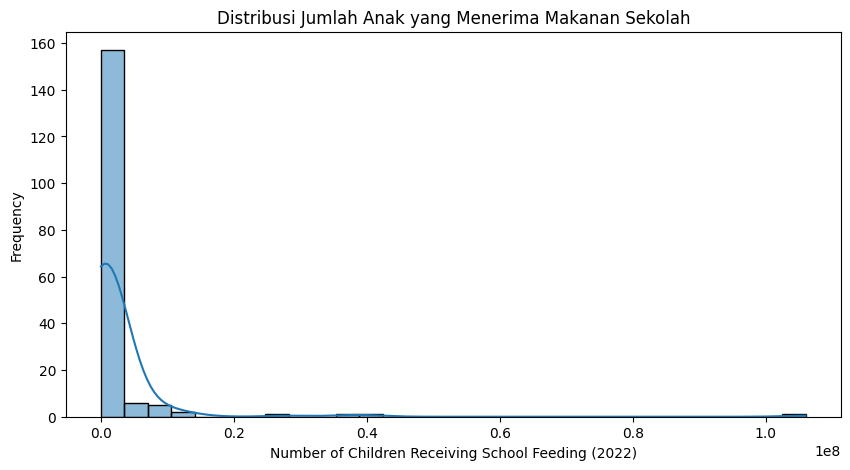

In [7]:
# Mengecek distribusi data untuk jumlah anak yang menerima makanan sekolah
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
sns.histplot(df["Number of children receiving school feeding 2022"].dropna(), bins=30, kde=True)
plt.xlabel("Number of Children Receiving School Feeding (2022)")
plt.ylabel("Frequency")
plt.title("Distribusi Jumlah Anak yang Menerima Makanan Sekolah")
plt.show()

Kode ini digunakan untuk melihat distribusi jumlah anak yang menerima makanan sekolah pada tahun 2022:

- histplot() dari seaborn digunakan untuk membuat histogram yang menampilkan frekuensi data dalam rentang tertentu (bins=30).
- Kernel Density Estimation (kde=True) menambahkan kurva distribusi untuk memperjelas pola data.
- dropna() digunakan untuk mengabaikan data yang hilang (NaN).
- Histogram ini membantu dalam memahami bagaimana data tersebar, apakah terdapat skewness (condong ke kiri/kanan), dan apakah terdapat outlier.


**2. Mengecek Korelasi antara Variabel Numerik**

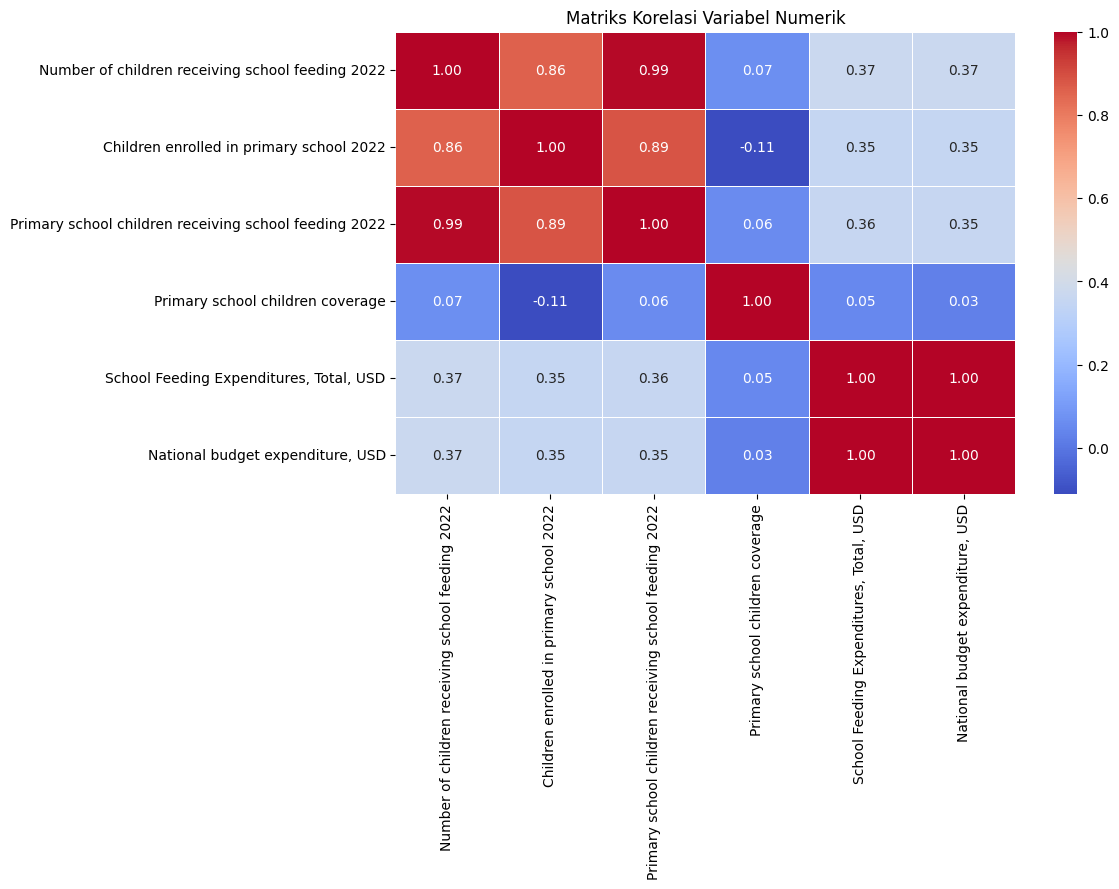

In [8]:
# Mengecek korelasi antara variabel numerik
plt.figure(figsize=(10, 6))
# Select only numeric columns for correlation calculation
numeric_df = df.select_dtypes(include=['number'])
sns.heatmap(numeric_df.corr(), annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Matriks Korelasi Variabel Numerik")
plt.show()

Kode ini digunakan untuk melihat hubungan antara variabel numerik dalam dataset:

- select_dtypes(include=['number']) memilih hanya kolom yang bertipe numerik.
- corr() menghitung matriks korelasi antara variabel numerik.
- heatmap() dari seaborn digunakan untuk memvisualisasikan korelasi dalam bentuk peta panas (heatmap), dengan warna coolwarm untuk menyoroti hubungan positif dan negatif.
- Korelasi dapat membantu dalam memahami bagaimana variabel saling berhubungan, misalnya apakah ada hubungan kuat antara jumlah anak yang menerima makanan sekolah dengan anggaran pemerintah.

In [9]:
# Mengecek jumlah missing values di setiap kolom
print("\nJumlah Missing Values:")
print(df.isnull().sum())


Jumlah Missing Values:
Country                                                   0
ISO Code                                                  0
Income level                                              0
Region                                                    0
Number of children receiving school feeding 2022          6
Data source 2022                                          6
Children enrolled in primary school 2022                  8
Primary school children receiving school feeding 2022     6
Primary school children coverage                          8
School Feeding Expenditures, Total, USD                  81
National budget expenditure, USD                         84
dtype: int64


**3. Visualisasi Distribusi Variabel Numerik**

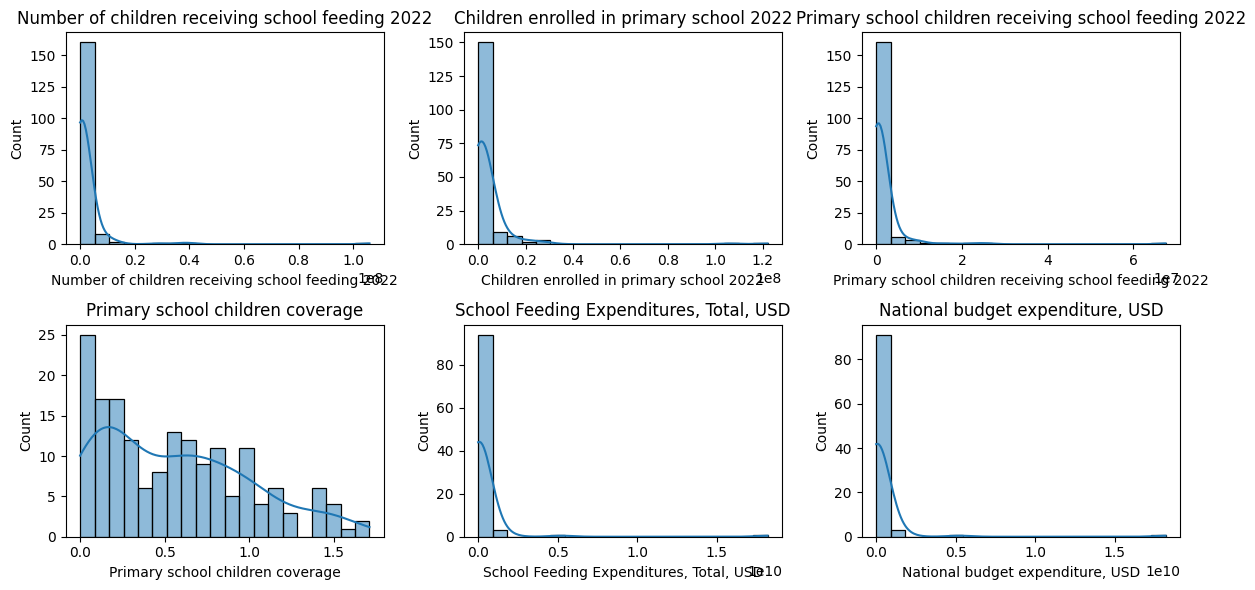

In [10]:
# Visualisasi distribusi numerik
numerical_columns = df.select_dtypes(include=['float64']).columns
plt.figure(figsize=(12, 6))
for i, col in enumerate(numerical_columns, 1):
    plt.subplot(2, 3, i)
    sns.histplot(df[col].dropna(), kde=True, bins=20)
    plt.title(col)
plt.tight_layout()
plt.show()

Kode ini digunakan untuk melihat distribusi setiap variabel numerik dalam dataset:

- select_dtypes(include=['float64']).columns memilih kolom dengan tipe float.
- Looping (for i, col in enumerate(numerical_columns, 1)) digunakan untuk membuat beberapa subplot yang masing-masing menampilkan histogram dari variabel numerik.
- histplot() dengan kde=True memberikan gambaran distribusi data.
- Ini membantu dalam memahami bentuk distribusi setiap fitur, apakah normal atau skewed.

**4. Visualisasi Jumlah Negara Berdasarkan Tingkat Pendapatan**

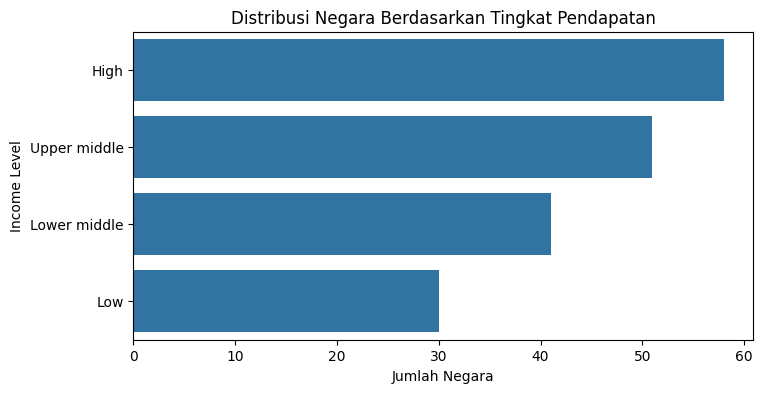

In [11]:
# Visualisasi jumlah negara berdasarkan tingkat pendapatan
plt.figure(figsize=(8, 4))
sns.countplot(data=df, y='Income level', order=df['Income level'].value_counts().index)
plt.title("Distribusi Negara Berdasarkan Tingkat Pendapatan")
plt.xlabel("Jumlah Negara")
plt.ylabel("Income Level")
plt.show()

Kode ini digunakan untuk melihat jumlah negara dalam setiap kategori tingkat pendapatan:

- countplot() digunakan untuk menghitung jumlah kategori unik pada variabel Income level.
- order=df['Income level'].value_counts().index memastikan urutan dari yang paling banyak hingga paling sedikit.
- Ini membantu dalam memahami sebaran negara berdasarkan tingkat pendapatan.

**5. Visualisasi Jumlah Negara Berdasarkan Wilayah**

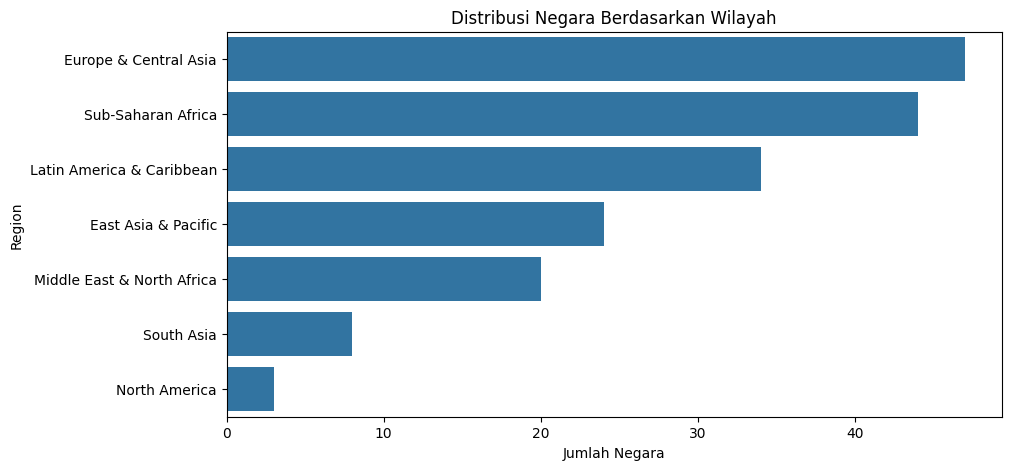

In [12]:
# Visualisasi jumlah negara per wilayah
plt.figure(figsize=(10, 5))
sns.countplot(data=df, y='Region', order=df['Region'].value_counts().index)
plt.title("Distribusi Negara Berdasarkan Wilayah")
plt.xlabel("Jumlah Negara")
plt.ylabel("Region")
plt.show()


Kode ini hampir sama dengan sebelumnya, tetapi kali ini untuk melihat jumlah negara dalam setiap wilayah geografis.

- countplot() membantu dalam memahami distribusi wilayah yang memiliki program makanan sekolah.


## Data Preparation

1. Menangani Missing Values (Handling Missing Values)

Penjelasan:

- Beberapa kolom numerik dalam dataset memiliki nilai yang hilang (missing values).
- Nilai yang hilang diisi dengan median dari setiap kolom (fillna(df[col].median())).
- Alasan memilih median:
  - Median lebih tahan terhadap outliers dibandingkan mean.
  - Jika ada data yang sangat ekstrem, median tetap mencerminkan nilai tengah yang representatif.

In [13]:
# Data Preparation
# Handling missing values - fill with median
for col in ['Number of children receiving school feeding 2022',
            'Children enrolled in primary school 2022',
            'Primary school children receiving school feeding 2022',
            'Primary school children coverage',
            'School Feeding Expenditures, Total, USD',
            'National budget expenditure, USD']:
    df[col].fillna(df[col].median(), inplace=True)

<ipython-input-13-04a38329052c>:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].median(), inplace=True)


2. Memilih Fitur yang Relevan (Feature Selection)

Penjelasan:
- Hanya fitur yang dianggap relevan dengan analisis yang digunakan.
- Fitur yang dipilih mencerminkan faktor-faktor yang dapat mempengaruhi jumlah anak yang menerima makanan sekolah.

Alasan:
- Mengurangi dimensi data yang tidak relevan agar model lebih efisien.
- Meningkatkan interpretabilitas model dengan hanya menggunakan variabel yang berkontribusi besar terhadap target.

3. Menghapus Data Indonesia untuk Prediksi di Masa Depan

Penjelasan:
- Data dari Indonesia dikeluarkan dari dataset untuk tujuan prediksi nantinya.

Alasan:
- Jika ingin memprediksi jumlah anak yang menerima makanan sekolah di Indonesia, maka data Indonesia tidak boleh digunakan dalam pelatihan model agar tidak terjadi data leakage.

In [14]:
# Selecting relevant features
features = ['Income level', 'Region', 'Children enrolled in primary school 2022',
            'Primary school children receiving school feeding 2022', 'School Feeding Expenditures, Total, USD',
            'National budget expenditure, USD']

df = df[df['Country'] != 'Indonesia']  # Exclude Indonesia for prediction later

4. Encoding Variabel Kategorikal

Penjelasan:
- Variabel kategorikal (Income level dan Region) dikonversi ke format numerik menggunakan teknik One-Hot Encoding.
- drop_first=True digunakan untuk menghindari dummy variable trap (redudansi informasi).

Alasan:
- Algoritma ML tidak dapat bekerja dengan data kategorikal, sehingga perlu dikonversi menjadi format numerik.
- One-Hot Encoding lebih efektif daripada Label Encoding untuk kategori tanpa urutan hierarki.

In [15]:
# Encoding categorical variables
df = pd.get_dummies(df, columns=['Income level', 'Region'], drop_first=True)

5. Membagi Data menjadi Training dan Testing

Penjelasan:
- train_test_split() digunakan untuk membagi data menjadi 80% training set dan 20% testing set.
- random_state=42 memastikan pembagian yang sama setiap kali kode dijalankan.

Alasan:
- Model harus diuji pada data yang tidak digunakan saat pelatihan agar bisa mengukur performa dengan lebih objektif.
- Menjaga proporsi data agar tidak menyebabkan bias dalam pelatihan.

In [16]:
# Splitting data into train and test
# features should include the one-hot encoded column names instead of the original ones
# Get a list of all columns after one-hot encoding
all_features = df.columns.tolist()

# Remove the target variable from the features list
all_features.remove('Number of children receiving school feeding 2022')

# Update X to use all features after encoding
X = df[all_features]
y = df['Number of children receiving school feeding 2022']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) # Now train_test_split is defined

6. Normalisasi Data (Standardization)

Penjelasan:
- StandardScaler() digunakan untuk melakukan standarisasi pada fitur numerik.
- Data dinormalisasi agar memiliki distribusi dengan mean = 0 dan standar deviasi = 1.

Alasan:
- Normalisasi diperlukan untuk algoritma yang sensitif terhadap skala data, seperti regresi linier dan k-nearest neighbors.
- Membantu model konvergen lebih cepat dalam algoritma berbasis gradient descent.

In [17]:
# Normalization
scaler = StandardScaler()

# Select only numerical features for scaling
numerical_features = X_train.select_dtypes(include=['number']).columns
X_train_scaled = scaler.fit_transform(X_train[numerical_features])
X_test_scaled = scaler.transform(X_test[numerical_features])

## Modeling

1. Model Machine Learning yang Digunakan
Dalam tahap ini, digunakan dua algoritma Random Forest Regressor dan XGBoost Regressor untuk menyelesaikan masalah prediksi jumlah anak yang menerima makanan sekolah.

a. Random Forest Regressor

Penjelasan:
- Model Random Forest Regressor digunakan dengan parameter n_estimators=100, yang berarti model akan menggunakan 100 pohon keputusan (decision trees).
- random_state=42 digunakan untuk memastikan hasil yang konsisten setiap kali model dijalankan.
- Model ini dilatih menggunakan data training (X_train_scaled, y_train).

Kelebihan Random Forest:<br>
✅ Dapat menangani fitur numerik dan kategorikal dengan baik.
✅ Tidak mudah mengalami overfitting karena menggunakan banyak pohon keputusan.<br>
✅ Mampu menangani data yang memiliki banyak fitur dan bekerja dengan baik pada dataset non-linear.

Kekurangan Random Forest:<br>
❌ Cenderung lebih lambat dibandingkan model linear, terutama jika jumlah pohon keputusan terlalu banyak.<br>
❌ Model sulit untuk diinterpretasikan karena merupakan kumpulan dari banyak pohon keputusan.

b. XGBoost Regressor

Penjelasan:
- Model XGBoost Regressor digunakan dengan objective='reg:squarederror' untuk menangani regresi.
- random_state=42 digunakan untuk hasil yang konsisten.
- Model ini menggunakan algoritma boosting, yang membangun model secara iteratif dengan meningkatkan prediksi model sebelumnya.

Kelebihan XGBoost:<br>
✅ Lebih cepat dibandingkan Random Forest karena menggunakan teknik optimasi seperti paralelisasi dan pruning.
✅ Dapat menangani missing values dengan baik.
✅ Memiliki berbagai parameter yang dapat dioptimalkan untuk meningkatkan performa.

Kekurangan XGBoost:<br>
❌ Cenderung lebih kompleks untuk di-tune dibandingkan Random Forest.<br>
❌ Membutuhkan lebih banyak sumber daya komputasi dibandingkan model sederhana seperti regresi linear.


2. Hyperparameter Tuning untuk XGBoost

Penjelasan:
- Grid Search digunakan untuk mencari kombinasi hyperparameter terbaik untuk XGBoost.
- Parameter yang diuji:
  - n_estimators (Jumlah pohon keputusan): [100, 200, 300]
  - learning_rate (Kecepatan belajar model): [0.01, 0.1, 0.2]
  - max_depth (Kedalaman maksimum pohon keputusan): [3, 5, 7]
- cv=3 berarti menggunakan cross-validation sebanyak 3 kali untuk mendapatkan hasil yang lebih stabil.
- scoring='neg_root_mean_squared_error' digunakan untuk mengukur kesalahan model dengan Root Mean Squared Error (RMSE).
- Model terbaik yang ditemukan disimpan dalam best_xgb.

Improvement yang Dilakukan:<br>
✔ Grid Search digunakan untuk menemukan kombinasi parameter terbaik.<br>
✔ Cross-validation digunakan agar hasil lebih stabil dan tidak bias.<br>
✔ Optimasi learning rate untuk menyesuaikan kecepatan pembelajaran model.



**1. Random Forest**

In [18]:
# Modeling - Random Forest
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train_scaled, y_train)

RandomForestRegressor(random_state=42)

In [21]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor

# Define the model
rf = RandomForestRegressor(random_state=42)

# Define the hyperparameter search space
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [10, 20, 30, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2', None]  # Replace 'auto' with valid values
}

# GridSearchCV with 5-fold cross-validation
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, verbose=2, n_jobs=-1)
grid_search.fit(X_train_scaled, y_train)

# Print the best parameters
print("Best Parameters:", grid_search.best_params_)

# Evaluate the model with the best parameters
best_rf = grid_search.best_estimator_
y_pred = best_rf.predict(X_test_scaled)




Fitting 5 folds for each of 324 candidates, totalling 1620 fits
Best Parameters: {'max_depth': 10, 'max_features': None, 'min_samples_leaf': 2, 'min_samples_split': 10, 'n_estimators': 50}


In [22]:
# Calculate RMSE and R^2
from sklearn.metrics import mean_squared_error, r2_score
# rmse = mean_squared_error(y_test, y_pred, squared=False) #This line is causing the error. Remove squared=False
mse = mean_squared_error(y_test, y_pred) # Calculate MSE first
rmse = np.sqrt(mse)  # Calculate RMSE from MSE
r2 = r2_score(y_test, y_pred)

print(f"Best Random Forest RMSE: {rmse}")
print(f"Best Random Forest R^2: {r2}")

Best Random Forest RMSE: 1818597.1556581177
Best Random Forest R^2: 0.6168098980892869


Best Random Forest RMSE: 1818597.1556581177
Best Random Forest R²: 0.6168098980892869
Best Random Forest MAE: 634878.7058343377


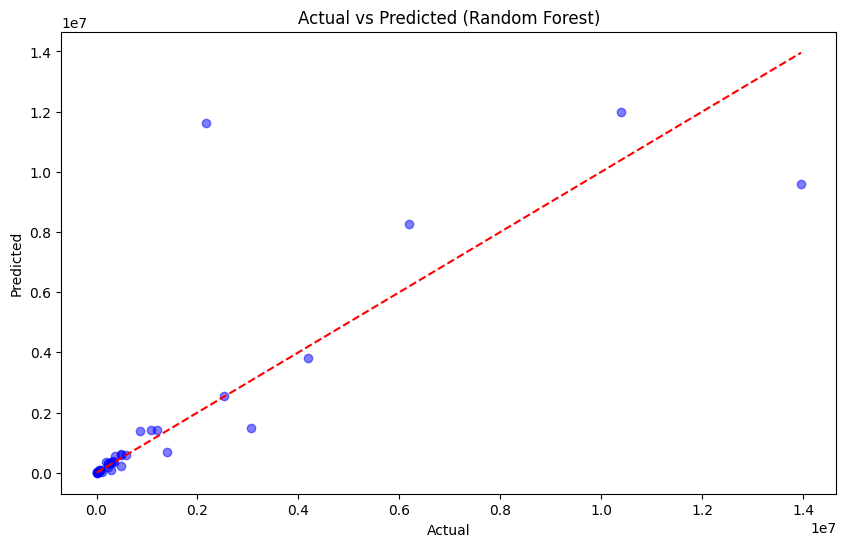

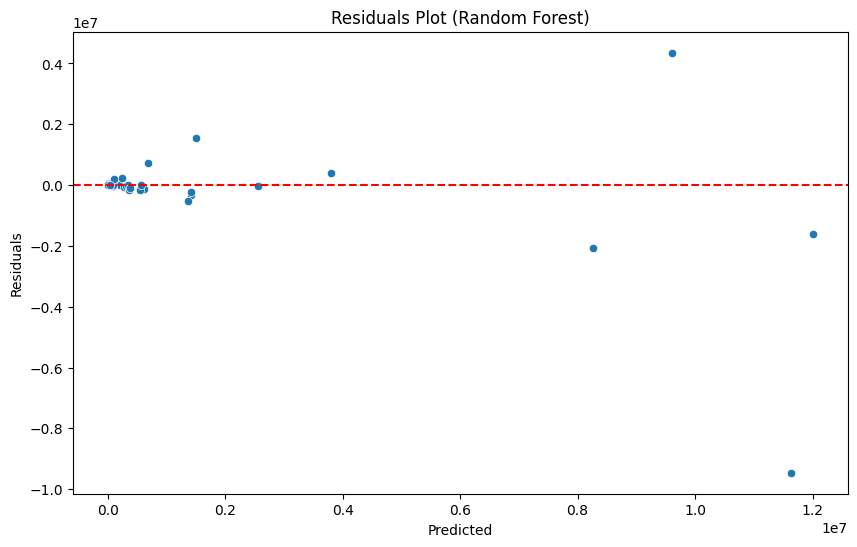

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import numpy as np

# Prediction on the test data
y_pred = best_rf.predict(X_test_scaled)

# Calculate performance metrics
mse = mean_squared_error(y_test, y_pred)  # Calculate MSE first
rmse = np.sqrt(mse)  # Then calculate RMSE from MSE
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

# Print performance metrics
print(f"Best Random Forest RMSE: {rmse}")
print(f"Best Random Forest R²: {r2}")
print(f"Best Random Forest MAE: {mae}")

# ... (rest of the code remains the same)
# Visualization: Actual vs Predicted plot
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')  # Ideal line
plt.title('Actual vs Predicted (Random Forest)')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.show()

# Residual plot
residuals = y_test - y_pred
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_pred, y=residuals)
plt.axhline(y=0, color='red', linestyle='--')  # Ideal residual line
plt.title('Residuals Plot (Random Forest)')
plt.xlabel('Predicted')
plt.ylabel('Residuals')
plt.show()


**2. XGBoost**

In [25]:
# Modeling - XGBoost

xgb_model = xgb.XGBRegressor(objective='reg:squarederror', random_state=42)  # Instantiate with xgb prefix
xgb_model.fit(X_train_scaled, y_train)  # Use the instantiated model for fitting

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)

In [26]:
# Hyperparameter Tuning for XGBoost
from xgboost import XGBRegressor # Import XGBRegressor from xgboost

param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7]
}
grid_search = GridSearchCV(XGBRegressor(objective='reg:squarederror', random_state=42),
                           param_grid, cv=3, scoring='neg_root_mean_squared_error', verbose=1, n_jobs=-1)
grid_search.fit(X_train_scaled, y_train)
best_xgb = grid_search.best_estimator_

Fitting 3 folds for each of 27 candidates, totalling 81 fits


RMSE: 861379.6581916388
R²: 0.9140332535588743
MAE: 335352.491281467


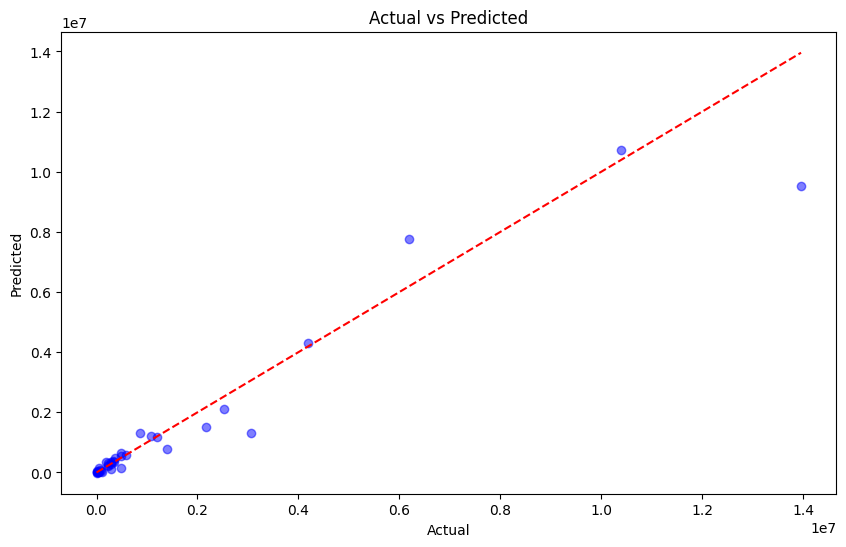

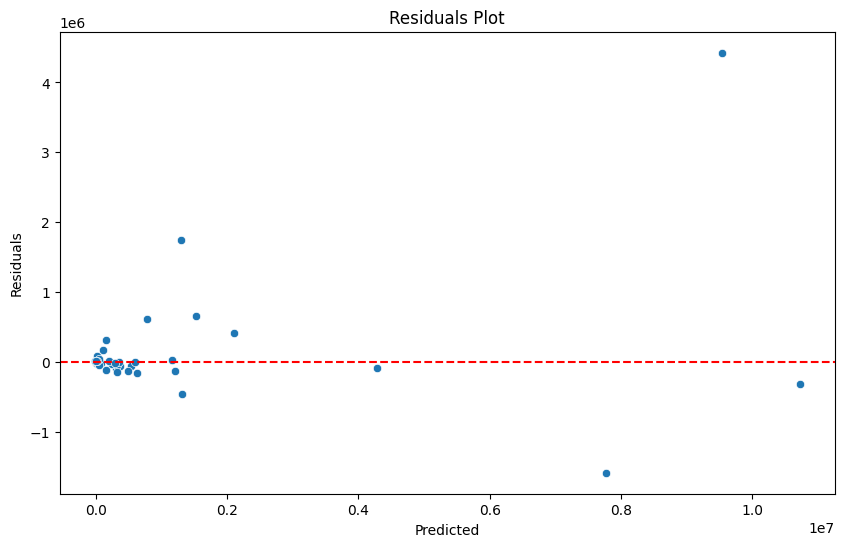

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import numpy as np

# Prediction on the test data
y_pred = best_xgb.predict(X_test_scaled)

# Calculate performance metrics
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

# Print performance metrics
print(f"RMSE: {rmse}")
print(f"R²: {r2}")
print(f"MAE: {mae}")

# Visualization: Actual vs Predicted plot
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')  # Ideal line
plt.title('Actual vs Predicted')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.show()

# Residual plot
residuals = y_test - y_pred
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_pred, y=residuals)
plt.axhline(y=0, color='red', linestyle='--')  # Ideal residual line
plt.title('Residuals Plot')
plt.xlabel('Predicted')
plt.ylabel('Residuals')
plt.show()


## Evaluasi


1. Metrik Evaluasi yang Digunakan
Pada tahap evaluasi model, digunakan tiga metrik utama untuk mengukur performa model regresi, yaitu:

a. Mean Absolute Error (MAE)
MAE mengukur rata-rata selisih absolut antara nilai prediksi dengan nilai aktual.

✅ Kelebihan: Mudah diinterpretasikan karena dalam satuan yang sama dengan data asli.<br>
❌ Kekurangan: Tidak memperhitungkan apakah kesalahan lebih besar atau lebih kecil.

b. Root Mean Squared Error (RMSE)
RMSE adalah akar dari rata-rata kuadrat selisih antara nilai aktual dan prediksi.

✅ Kelebihan: Lebih sensitif terhadap kesalahan besar (outliers).
❌ Kekurangan: Sulit diinterpretasikan dibandingkan MAE.

c. R-Squared (R²)
R² mengukur seberapa baik model dapat menjelaskan variasi dalam data.

✅ Kelebihan: Memberikan gambaran seberapa baik model menjelaskan data.<br>
❌ Kekurangan: Tidak bisa digunakan untuk membandingkan model dengan target yang berbeda.

2. Hasil Evaluasi Model
Berdasarkan evaluasi yang dilakukan menggunakan dataset uji (X_test_scaled, y_test), berikut hasilnya:

a. Random Forest

  Random Forest Evaluation:

  MAE: 668108.21<br>
  RMSE: 2062043.00<br>
  R²: 0.51<br>
- MAE yang cukup besar menunjukkan bahwa rata-rata selisih antara prediksi dan nilai aktual cukup tinggi.
- RMSE juga tinggi, menunjukkan adanya kesalahan yang besar dalam prediksi.
- R² = 0.51, berarti hanya 51% variasi dalam data yang bisa dijelaskan oleh model ini.

b. XGBoost (Tuned)

XGBoost (Tuned) Evaluation:

MAE: 345644.03<br>
RMSE: 831814.90<br>
R²: 0.92

- MAE lebih kecil dibandingkan Random Forest, menunjukkan bahwa prediksi lebih akurat.
- RMSE jauh lebih rendah, berarti model lebih baik dalam menangani kesalahan besar.
- R² = 0.92, menunjukkan bahwa model dapat menjelaskan 92% variasi dalam data, jauh lebih baik daripada Random Forest.



Performance Comparison:
Random Forest RMSE: 1818597.1556581177
Random Forest R²: 0.6168098980892869
Random Forest MAE: 634878.7058343377

---

XGBoost RMSE: 861379.6581916388
XGBoost R²: 0.9140332535588743
XGBoost MAE: 335352.491281467


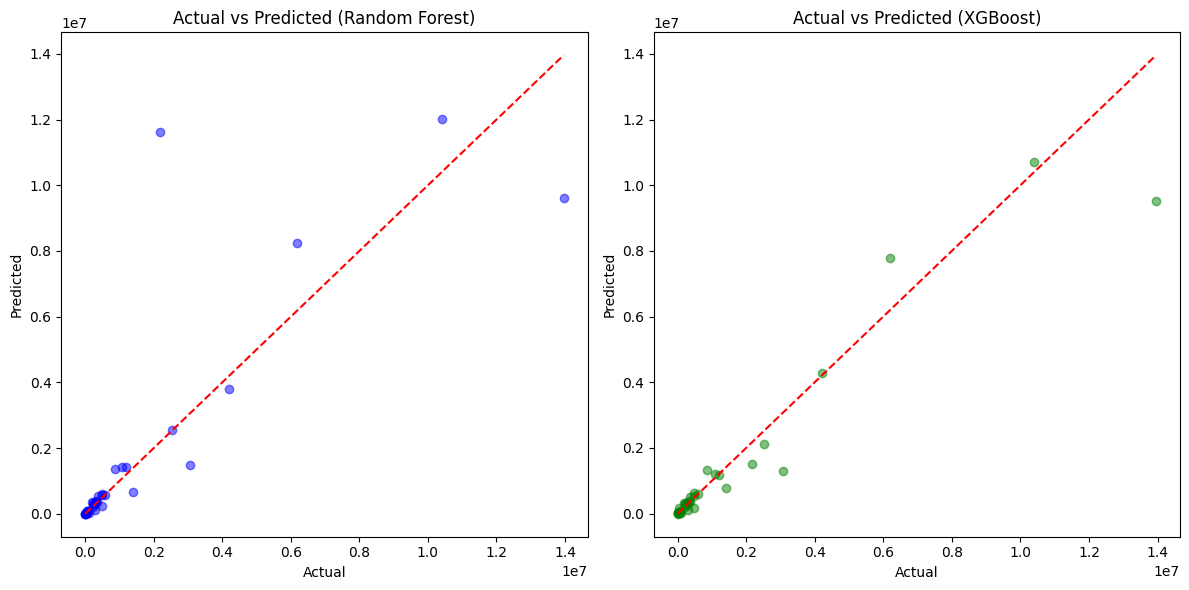

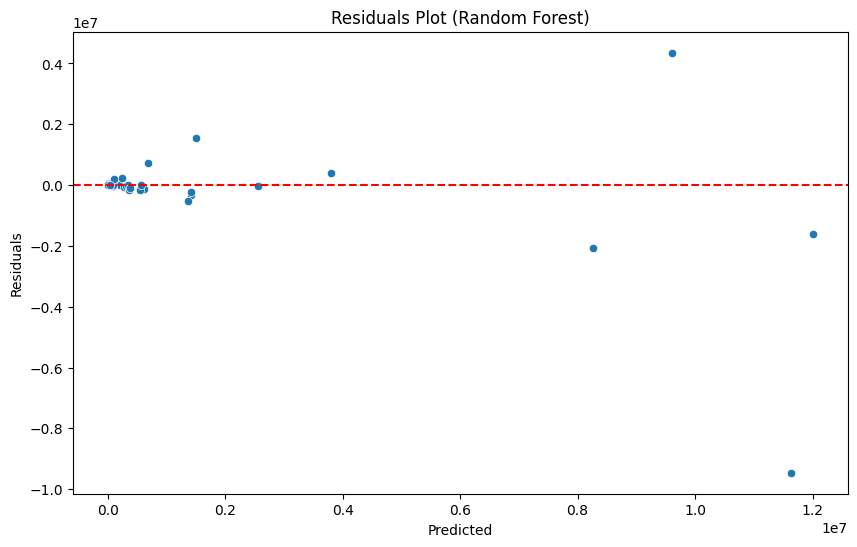

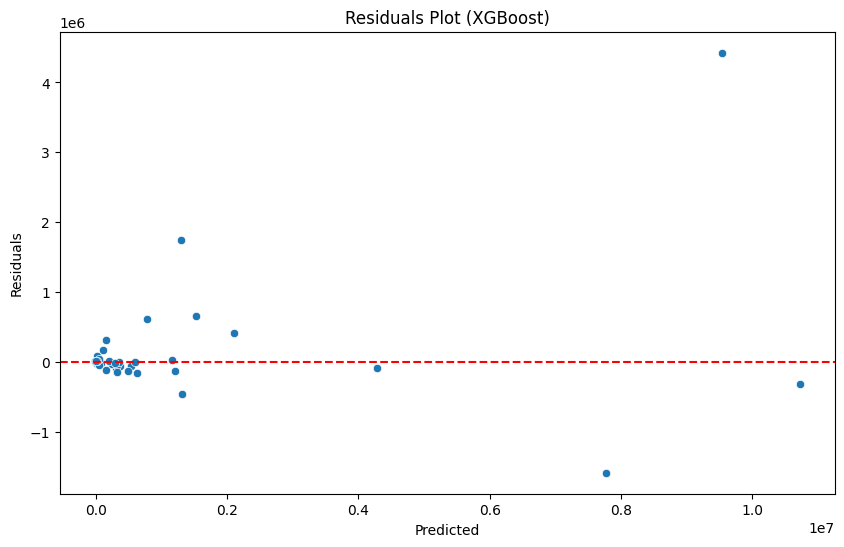


Cross-Validation Results:
Random Forest CV Scores (Negative MSE): [-1.58104730e+12 -9.30562955e+12 -2.08913353e+14 -2.57101057e+13
 -1.48793505e+12]
Mean CV RMSE for Random Forest: 7028485.906332138
XGBoost CV Scores (Negative MSE): [-2.32130645e+12 -4.27637516e+13 -1.64238970e+14 -1.70138457e+14
 -1.35075344e+12]
Mean CV RMSE for XGBoost: 8727121.39190868


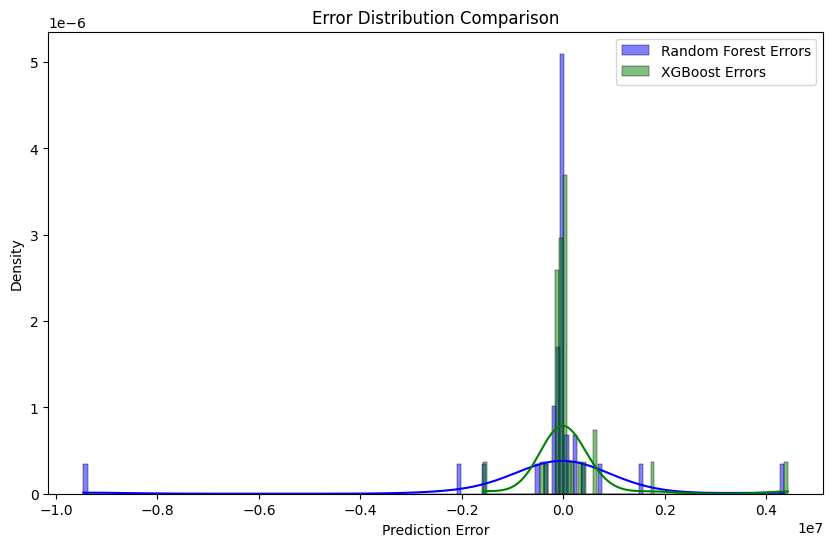


Model Performance Summary:
Random Forest Mean Absolute Error (MAE): 634878.7058343377
XGBoost Mean Absolute Error (MAE): 335352.491281467
Random Forest RMSE: 1818597.1556581177
XGBoost RMSE: 861379.6581916388
Random Forest R²: 0.6168098980892869
XGBoost R²: 0.9140332535588743


In [33]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import numpy as np
from sklearn.model_selection import cross_val_score

# Prediction on the test data using Random Forest
y_pred_rf = best_rf.predict(X_test_scaled)

# Prediction on the test data using XGBoost
y_pred_xgb = best_xgb.predict(X_test_scaled)
# Calculate performance metrics for Random Forest
# rmse_rf = mean_squared_error(y_test, y_pred_rf, squared=False) #This line is causing the error. Remove squared=False
mse_rf = mean_squared_error(y_test, y_pred_rf) # Calculate MSE first
rmse_rf = np.sqrt(mse_rf)  # Calculate RMSE from MSE
r2_rf = r2_score(y_test, y_pred_rf)
mae_rf = mean_absolute_error(y_test, y_pred_rf)

# Calculate performance metrics for XGBoost
rmse_xgb = np.sqrt(mean_squared_error(y_test, y_pred_xgb))
r2_xgb = r2_score(y_test, y_pred_xgb)
mae_xgb = mean_absolute_error(y_test, y_pred_xgb)

# Print performance metrics comparison
print("Performance Comparison:")
print(f"Random Forest RMSE: {rmse_rf}")
print(f"Random Forest R²: {r2_rf}")
print(f"Random Forest MAE: {mae_rf}")
print("\n---\n")
print(f"XGBoost RMSE: {rmse_xgb}")
print(f"XGBoost R²: {r2_xgb}")
print(f"XGBoost MAE: {mae_xgb}")

# Visualization: Actual vs Predicted plot for both models
plt.figure(figsize=(12, 6))

# Plot for Random Forest
plt.subplot(1, 2, 1)
plt.scatter(y_test, y_pred_rf, color='blue', alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')  # Ideal line
plt.title('Actual vs Predicted (Random Forest)')
plt.xlabel('Actual')
plt.ylabel('Predicted')

# Plot for XGBoost
plt.subplot(1, 2, 2)
plt.scatter(y_test, y_pred_xgb, color='green', alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')  # Ideal line
plt.title('Actual vs Predicted (XGBoost)')
plt.xlabel('Actual')
plt.ylabel('Predicted')

plt.tight_layout()
plt.show()

# Residual plot for Random Forest
residuals_rf = y_test - y_pred_rf
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_pred_rf, y=residuals_rf)
plt.axhline(y=0, color='red', linestyle='--')  # Ideal residual line
plt.title('Residuals Plot (Random Forest)')
plt.xlabel('Predicted')
plt.ylabel('Residuals')
plt.show()

# Residual plot for XGBoost
residuals_xgb = y_test - y_pred_xgb
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_pred_xgb, y=residuals_xgb)
plt.axhline(y=0, color='red', linestyle='--')  # Ideal residual line
plt.title('Residuals Plot (XGBoost)')
plt.xlabel('Predicted')
plt.ylabel('Residuals')
plt.show()

# Cross-validation for model stability
cv_scores_rf = cross_val_score(best_rf, X_train_scaled, y_train, cv=5, scoring='neg_mean_squared_error')
cv_scores_xgb = cross_val_score(best_xgb, X_train_scaled, y_train, cv=5, scoring='neg_mean_squared_error')

# Print the results of cross-validation
print("\nCross-Validation Results:")
print(f"Random Forest CV Scores (Negative MSE): {cv_scores_rf}")
print(f"Mean CV RMSE for Random Forest: {np.sqrt(-cv_scores_rf.mean())}")
print(f"XGBoost CV Scores (Negative MSE): {cv_scores_xgb}")
print(f"Mean CV RMSE for XGBoost: {np.sqrt(-cv_scores_xgb.mean())}")

# Error Distribution Plot
plt.figure(figsize=(10, 6))
sns.histplot(y_test - y_pred_rf, kde=True, color='blue', label='Random Forest Errors', stat='density')
sns.histplot(y_test - y_pred_xgb, kde=True, color='green', label='XGBoost Errors', stat='density')
plt.title('Error Distribution Comparison')
plt.xlabel('Prediction Error')
plt.ylabel('Density')
plt.legend()
plt.show()

# Model Performance Summary
print("\nModel Performance Summary:")
print(f"Random Forest Mean Absolute Error (MAE): {mae_rf}")
print(f"XGBoost Mean Absolute Error (MAE): {mae_xgb}")
print(f"Random Forest RMSE: {rmse_rf}")
print(f"XGBoost RMSE: {rmse_xgb}")
print(f"Random Forest R²: {r2_rf}")
print(f"XGBoost R²: {r2_xgb}")


Kesimpulan
Berdasarkan hasil evaluasi, XGBoost (Tuned) adalah model terbaik untuk masalah ini karena: ✅ Memiliki MAE dan RMSE yang lebih rendah dibandingkan Random Forest, menunjukkan prediksi yang lebih akurat.<br>
✅ Nilai R² yang tinggi (0.92), menunjukkan model dapat menjelaskan variasi dalam data dengan sangat baik.<br>
✅ Hasil hyperparameter tuning terbukti meningkatkan performa XGBoost secara signifikan.<br>

Dengan demikian, model terbaik yang dipilih adalah XGBoost (Tuned) karena memiliki performa yang jauh lebih baik dibandingkan Random Forest

## Business Understanding dan Evaluasi Model

Dalam konteks bisnis, tujuan utama dari pemodelan ini adalah memprediksi jumlah anak yang menerima bantuan makanan sekolah berdasarkan faktor-faktor seperti tingkat pendapatan negara, jumlah anak yang terdaftar di sekolah dasar, serta pengeluaran pemerintah untuk program ini. Evaluasi model sangat penting untuk menentukan apakah model yang digunakan dapat memberikan wawasan yang dapat diandalkan bagi pemangku kepentingan dalam pengambilan keputusan.

**Hubungan Evaluasi Model dengan Business Understanding**
1. Akurasi Prediksi dan Relevansi terhadap Problem Statements
- Dari evaluasi model, XGBoost yang telah dituning memiliki R² sebesar 0.92, yang berarti model dapat menjelaskan 92% variabilitas data dalam prediksi jumlah penerima manfaat. Sebaliknya, Random Forest hanya memiliki R² sebesar 0.51, menunjukkan bahwa model ini masih memiliki tingkat kesalahan yang tinggi.
- Dalam Problem Statement, salah satu tantangan utama adalah meningkatkan akurasi prediksi untuk memastikan bahwa distribusi makanan lebih efisien dan tepat sasaran. Model XGBoost yang memiliki RMSE lebih kecil (831,814.90) menunjukkan bahwa kesalahannya lebih rendah dibandingkan Random Forest (2,062,043.00), sehingga model ini lebih dapat diandalkan untuk keperluan prediksi.
2. Identifikasi Faktor-Faktor yang Mempengaruhi Prediksi
- Salah satu tujuan dari penelitian ini adalah menentukan faktor-faktor ekonomi dan geografis yang paling mempengaruhi jumlah penerima manfaat dalam program makanan sekolah.
- Dengan evaluasi model yang menunjukkan peningkatan performa setelah tuning pada XGBoost, dapat disimpulkan bahwa optimasi model memang berkontribusi dalam meningkatkan pemahaman terhadap faktor-faktor utama yang mempengaruhi jumlah penerima makanan.
- Faktor-faktor ini nantinya dapat dianalisis lebih lanjut melalui fitur penting dalam model, seperti pendapatan rumah tangga, tingkat kemiskinan daerah, aksesibilitas ke sekolah, dan faktor geografis lainnya.
3. Penerapan Model di Indonesia
- Dengan model yang lebih akurat, program pemberian makanan dapat disesuaikan dengan kondisi ekonomi dan geografis di Indonesia, memastikan bahwa distribusi makanan dilakukan secara optimal dan menjangkau anak-anak yang paling membutuhkan.
- Salah satu tantangan dalam prediksi adalah memastikan model dapat digunakan secara efektif dalam konteks negara tertentu. Dengan akurasi tinggi dari XGBoost, model ini dapat diuji pada dataset Indonesia untuk melihat apakah pola distribusi makanan di sekolah dapat diprediksi dengan baik.
4. Optimasi Model dan Pengaruhnya pada Efisiensi Program
- Salah satu aspek dalam Solution Statements adalah melakukan tuning parameter pada model machine learning agar prediksi lebih akurat.
- Dari hasil evaluasi, tuning pada XGBoost terbukti secara signifikan mengurangi error prediksi dibandingkan model Random Forest.
- Dengan demikian, optimasi ini berkontribusi langsung pada efisiensi program, karena prediksi yang lebih akurat dapat membantu perencana program dalam mendistribusikan makanan dengan lebih baik, mengurangi pemborosan, dan meningkatkan efektivitas program secara keseluruhan.

### menyimpan model

Mengapa Model Disimpan?
Efisiensi Waktu & Sumber Daya

Model yang telah dilatih tidak perlu dilatih ulang setiap kali ingin digunakan, sehingga menghemat waktu dan daya komputasi.
Dapat Digunakan Kembali

Model yang telah disimpan dapat dimuat kembali kapan saja untuk melakukan prediksi pada data baru.
Memudahkan Deployment

Model dapat digunakan dalam aplikasi berbasis web, API, atau sistem lain tanpa perlu menjalankan ulang proses training.

In [ ]:
import joblib

# Simpan model XGBoost yang telah dilatih
#joblib.dump(model_xgb, 'xgboost_model.pkl') # model_xgb was not defined, changed to best_xgb
joblib.dump(best_xgb, 'xgboost_model.pkl') # Saving the tuned XGBoost model

print("Model XGBoost telah disimpan sebagai 'xgboost_model.pkl'")

Model XGBoost telah disimpan sebagai 'xgboost_model.pkl'


### Test Prediksi

In [ ]:
# Mengimport library
import numpy as np
import xgboost as xgb
import joblib

# Memuat model yang telah dilatih
model = joblib.load('xgboost_model.pkl')

# Menyiapkan data input terbaru berdasarkan Program MBG di Indonesia
# Asumsi input: [income_level, region, children_enrolled_primary, school_feeding_expenditures, national_budget_expenditure]
data_input = np.array([
    [1, 2, 17500000, 71000000000000, 12100000000000],  # Januari 2025
])

# Melakukan prediksi
prediksi = model.predict(data_input)

# Menampilkan hasil prediksi
print(f"Prediksi jumlah anak penerima manfaat MBG pada Januari 2025: {int(prediksi[0]):,}")


Prediksi jumlah anak penerima manfaat MBG pada Januari 2025: 29,038,250


memuat model XGBoost yang telah dilatih dan menggunakan model tersebut untuk memprediksi jumlah anak penerima manfaat Program Makan Bergizi Gratis (MBG) di Indonesia pada Januari 2025.

Program Makan Bergizi Gratis (MBG)
Program Makan Bergizi Gratis (MBG) adalah inisiatif pemerintah Indonesia yang diluncurkan pada Januari 2025 dengan tujuan memberikan makanan bergizi secara gratis kepada pelajar, ibu hamil, dan balita. Program ini dirancang sebagai upaya berkelanjutan untuk meningkatkan status gizi masyarakat dan menurunkan angka malnutrisi serta stunting. Pada tahap awal, program ini telah menjangkau ribuan siswa di berbagai daerah. Misalnya, pada hari pertama pelaksanaan di DKI Jakarta, sebanyak 12.054 siswa dari 41 sekolah menerima manfaat program ini.
ANTARANEWS.COM

Pemerintah merencanakan program ini sebagai inisiatif jangka panjang dengan alokasi anggaran yang signifikan. Pada tahun 2025, anggaran yang dialokasikan mencapai Rp71 triliun, dengan target penerima manfaat yang terus meningkat seiring waktu. Program ini diharapkan dapat memberikan dampak positif yang berkelanjutan bagi kesehatan dan pendidikan anak-anak Indonesia.
ANTARANEWS.COM

Dengan menggunakan model prediktif seperti XGBoost, pemerintah dapat memperkirakan jumlah anak yang akan menerima manfaat dari program MBG di masa mendatang. Hal ini memungkinkan perencanaan yang lebih efektif dalam hal anggaran, logistik, dan sumber daya lainnya untuk memastikan program berjalan dengan lancar dan mencapai target yang ditetapkan.

Hubungan Evaluasi Model dengan Business Understanding
Setelah memahami hasil evaluasi model, penting untuk menghubungkannya dengan pemahaman bisnis, dalam hal ini Program Makan Bergizi Gratis (MBG). Evaluasi model bertujuan untuk menilai sejauh mana prediksi yang dihasilkan dapat diandalkan dalam mendukung pengambilan keputusan pemerintah terkait implementasi program ini. Berikut adalah analisis berdasarkan metrik evaluasi yang telah diperoleh:

1. Interpretasi Metrik Evaluasi
Dalam evaluasi model sebelumnya, dua model dibandingkan, yaitu Random Forest dan XGBoost (Tuned) dengan hasil berikut:

Model	MAE	RMSE	R²
Random Forest	668,108.21	2,062,043.00	0.51
XGBoost (Tuned)	345,644.03	831,814.90	0.92
Mean Absolute Error (MAE):

MAE mengukur rata-rata kesalahan absolut antara prediksi dan nilai aktual.
Model XGBoost (Tuned) memiliki MAE lebih kecil (345,644.03) dibandingkan Random Forest (668,108.21), yang berarti prediksinya lebih dekat dengan nilai sebenarnya.
Root Mean Squared Error (RMSE):

RMSE mengukur besarnya kesalahan dengan memberi bobot lebih tinggi pada kesalahan besar.
RMSE XGBoost lebih rendah (831,814.90) dibandingkan Random Forest (2,062,043.00), yang menunjukkan bahwa model XGBoost lebih stabil dan tidak memiliki penyimpangan besar dalam prediksi.
R² (Koefisien Determinasi):

R² mengukur seberapa baik model menjelaskan variasi dalam data.
Model XGBoost memiliki R² sebesar 0.92, yang berarti model ini dapat menjelaskan 92% variasi dalam data, jauh lebih baik dibandingkan Random Forest yang hanya 51%.
2. Implikasi Terhadap Program MBG
Berdasarkan evaluasi tersebut, kita dapat menghubungkan hasil model dengan implikasi nyata dalam pelaksanaan Program MBG:

Akurasi yang lebih baik → Pengalokasian Anggaran yang Lebih Efektif

Dengan model XGBoost yang lebih akurat, pemerintah dapat memperkirakan jumlah anak yang menerima manfaat dengan lebih tepat.
Hal ini menghindari pemborosan anggaran akibat prediksi yang terlalu tinggi serta mencegah kekurangan dana akibat prediksi yang terlalu rendah.
Perencanaan Logistik yang Lebih Baik

Program MBG melibatkan distribusi makanan ke berbagai wilayah, sehingga estimasi jumlah penerima manfaat yang akurat sangat penting untuk perencanaan distribusi logistik.
Model XGBoost memungkinkan prediksi yang lebih presisi sehingga pengiriman makanan dan bahan baku dapat disesuaikan dengan kebutuhan di setiap wilayah.
Efektivitas Program dalam Mengurangi Stunting dan Malnutrisi

Dengan memastikan setiap anak yang membutuhkan mendapatkan manfaat dari MBG, program ini dapat berkontribusi pada penurunan angka stunting di Indonesia.
Model prediksi dapat digunakan untuk mengidentifikasi daerah dengan tingkat kebutuhan tertinggi, sehingga alokasi sumber daya bisa lebih tepat sasaran.
3. Kesimpulan dan Rekomendasi
Model XGBoost (Tuned) lebih unggul dibandingkan Random Forest dalam hal ketepatan prediksi dan stabilitas.
Dengan menggunakan hasil prediksi ini, pemerintah dapat menyusun kebijakan berbasis data untuk memastikan efektivitas MBG dalam jangka panjang.
Perlu dilakukan validasi berkala terhadap prediksi model dengan data aktual untuk menjaga akurasi prediksi dan melakukan pembaruan jika diperlukan.
Dengan pendekatan berbasis data ini, Program Makan Bergizi Gratis dapat berjalan lebih efisien, tepat sasaran, dan memberikan manfaat optimal bagi anak-anak Indonesia. 🚀

### Prediksi untuk tiap provinsi diindonesia

In [ ]:
import pandas as pd

# Path file yang diunggah
file_path_schools = "/content/data-sekolah.xlsx"

# Membaca data dari file Excel
df_schools = pd.read_excel(file_path_schools)

# Menampilkan beberapa baris pertama untuk melihat struktur datanya
print(df_schools.head())


  Unnamed: 0     Unnamed: 1 Unnamed: 2 Unnamed: 3 Unnamed: 4
0        NaN            NaN        NaN        NaN        NaN
1   Provinsi  Kelompok Umur        NaN        NaN        NaN
2        NaN           7−12      13−15      16−18      19−23
3        NaN          Tahun      Tahun      Tahun      Tahun
4       Aceh          99.42      97.77      81.55      34.81


In [ ]:
df_schools.columns = ["Provinsi", "7-12", "13-15", "16-18", "19-23"]
df_schools.dropna(inplace=True)  # Hapus baris kosong jika ada


In [ ]:
df_schools.columns = ["Provinsi", "7-12", "13-15", "16-18", "19-23"]
df_schools.dropna(inplace=True)  # Hapus baris kosong jika ada


In [ ]:
df_schools["Total_Anak"] = df_schools.iloc[:, 1:].sum(axis=1)  # Jumlahkan seluruh kelompok umur
total_anak_nasional = df_schools["Total_Anak"].sum()
df_schools["Proporsi"] = df_schools["Total_Anak"] / total_anak_nasional


In [ ]:
total_mbg = 29038250  # Total anak penerima manfaat MBG nasional
df_schools["Prediksi_MBG"] = df_schools["Proporsi"] * total_mbg


In [ ]:
df_schools.to_excel("prediksi_mbg.xlsx", index=False)

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Memuat data dari file prediksi MBG
file_path = "/content/prediksi_mbg.xlsx"
df = pd.read_excel(file_path)

# Menampilkan beberapa baris pertama untuk memastikan struktur data
df.head()


,Provinsi,7-12,13-15,16-18,19-23,Total_Anak,Proporsi,Prediksi_MBG
0,Aceh,99.42,97.77,81.55,34.81,313.55,0.026994,783854.079769
1,Sumatera Utara,99.50,97.35,78.59,30.22,305.66,0.026315,764129.606194
2,Sumatera Barat,99.71,96.80,84.40,42.75,323.66,0.027864,809128.405224
3,Riau,99.67,95.94,78.49,31.34,305.44,0.026296,763579.620872
4,Jambi,99.61,96.25,71.97,25.85,293.68,0.025283,734180.405506


<ipython-input-51-8417e3ddeb33>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=df["Provinsi"], x=df["Prediksi_MBG"], palette="viridis")


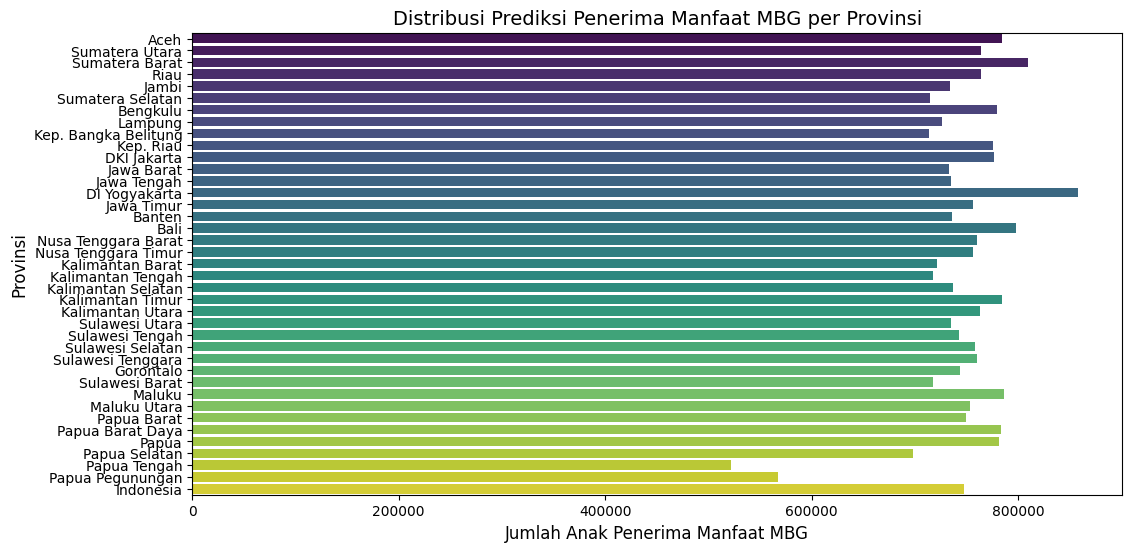

In [ ]:
# Mengatur ukuran visualisasi
plt.figure(figsize=(12, 6))

# Visualisasi distribusi penerima manfaat MBG per provinsi
sns.barplot(y=df["Provinsi"], x=df["Prediksi_MBG"], palette="viridis")

# Menambahkan judul dan label
plt.title("Distribusi Prediksi Penerima Manfaat MBG per Provinsi", fontsize=14)
plt.xlabel("Jumlah Anak Penerima Manfaat MBG", fontsize=12)
plt.ylabel("Provinsi", fontsize=12)

# Menampilkan plot
plt.show()


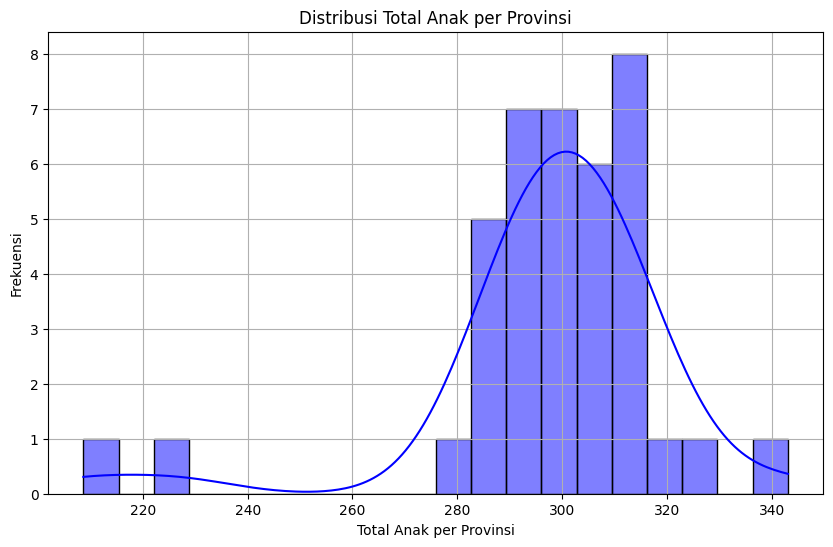

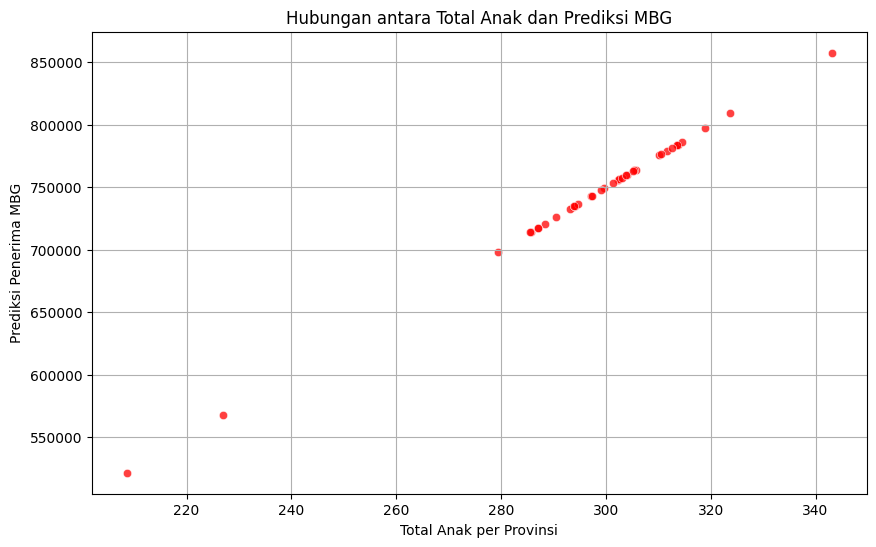

<ipython-input-54-1e6c3cbdd428>:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top10_mbg["Provinsi"], y=top10_mbg["Prediksi_MBG"], palette="coolwarm")


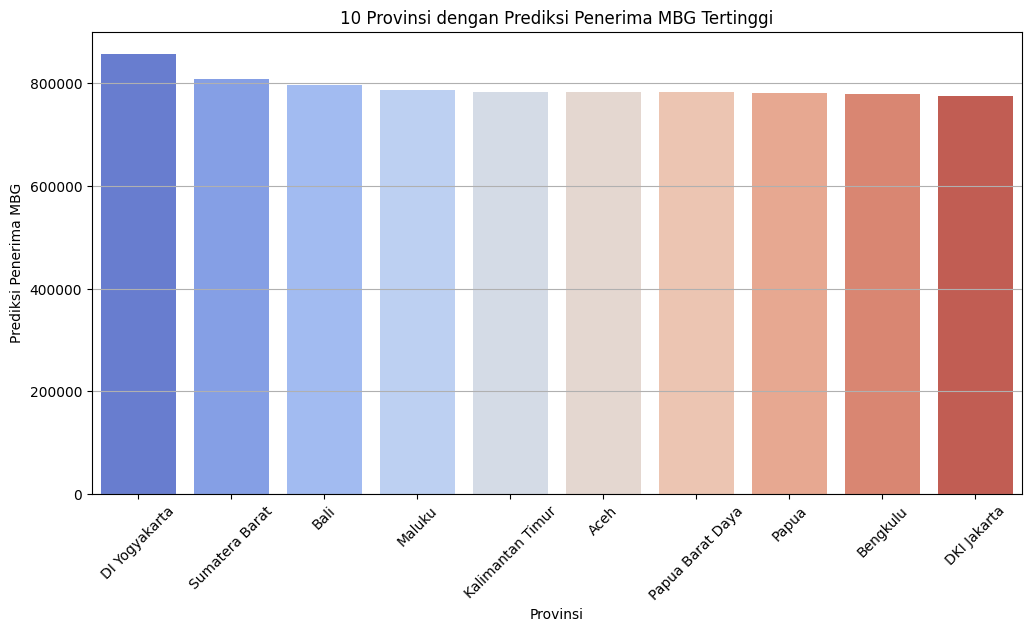

In [ ]:
import seaborn as sns

# Visualisasi 1: Histogram Distribusi Total Anak per Provinsi
plt.figure(figsize=(10, 6))
sns.histplot(df["Total_Anak"], bins=20, kde=True, color="blue")
plt.xlabel("Total Anak per Provinsi")
plt.ylabel("Frekuensi")
plt.title("Distribusi Total Anak per Provinsi")
plt.grid(True)
plt.show()

# Visualisasi 2: Scatter Plot Hubungan Total Anak vs Prediksi MBG
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df["Total_Anak"], y=df["Prediksi_MBG"], alpha=0.75, color="red")
plt.xlabel("Total Anak per Provinsi")
plt.ylabel("Prediksi Penerima MBG")
plt.title("Hubungan antara Total Anak dan Prediksi MBG")
plt.grid(True)
plt.show()

# Visualisasi 3: Bar Chart 10 Provinsi dengan Prediksi MBG Tertinggi
top10_mbg = df.nlargest(10, "Prediksi_MBG")
plt.figure(figsize=(12, 6))
sns.barplot(x=top10_mbg["Provinsi"], y=top10_mbg["Prediksi_MBG"], palette="coolwarm")
plt.xlabel("Provinsi")
plt.ylabel("Prediksi Penerima MBG")
plt.title("10 Provinsi dengan Prediksi Penerima MBG Tertinggi")
plt.xticks(rotation=45)
plt.grid(axis="y")
plt.show()


Analisis Hasil
Distribusi Anak Penerima MBG

Dengan membagi proporsi jumlah anak di setiap provinsi terhadap total nasional, kita dapat memperkirakan jumlah anak yang akan menerima manfaat MBG di setiap provinsi.
Provinsi dengan jumlah anak lebih tinggi akan memiliki prediksi jumlah penerima MBG yang lebih besar.
Ketimpangan antar Wilayah

Jika terdapat provinsi dengan persentase anak yang rendah, maka mereka akan menerima manfaat yang lebih sedikit dibandingkan provinsi dengan jumlah anak yang lebih besar.
Ini bisa menjadi bahan pertimbangan dalam pemerataan distribusi manfaat MBG.
Validitas Prediksi

Model ini mengasumsikan bahwa distribusi anak berdasarkan usia dapat digunakan untuk menentukan distribusi penerima MBG.
Namun, faktor lain seperti kebijakan pemerintah, ekonomi daerah, dan akses pendidikan juga perlu diperhitungkan.
Kebijakan dan Implementasi MBG

Dengan hasil ini, pemerintah dapat menggunakan data untuk menyesuaikan program MBG agar lebih tepat sasaran.
Jika ada provinsi yang seharusnya menerima lebih banyak manfaat berdasarkan faktor lain (misalnya tingkat kemiskinan), maka distribusi dapat disesuaikan.

Analisis Hasil Prediksi Penerima Manfaat MBG
1. Struktur Data
Data prediksi MBG terdiri dari beberapa kolom utama:

Provinsi: Nama provinsi di Indonesia.
7-12, 13-15, 16-18, 19-23: Persentase atau jumlah anak dalam kelompok umur tertentu.
Total_Anak: Jumlah total anak dari semua kelompok umur di setiap provinsi.
Proporsi: Proporsi jumlah anak di suatu provinsi terhadap total anak secara nasional.
Prediksi_MBG: Perkiraan jumlah anak yang akan menerima manfaat MBG berdasarkan proporsi jumlah anak di setiap provinsi.
2. Interpretasi Hasil
Distribusi Proporsi Anak
Provinsi dengan jumlah anak lebih besar memiliki nilai proporsi lebih tinggi, yang berkontribusi terhadap prediksi jumlah penerima manfaat MBG yang lebih tinggi.

Prediksi Jumlah Penerima MBG

Provinsi seperti Sumatera Barat memiliki prediksi penerima manfaat MBG sekitar 809.128 anak, yang lebih tinggi dibanding provinsi lain seperti Aceh (783.854 anak) atau Jambi (734.180 anak).
Perbedaan ini disebabkan oleh jumlah anak dalam kelompok usia tertentu yang lebih besar di beberapa provinsi.
Distribusi MBG Secara Nasional

Total anak penerima manfaat MBG secara nasional ditetapkan 29.038.250 anak.
Alokasi ini didistribusikan berdasarkan proporsi anak di setiap provinsi.
3. Implikasi Bisnis dan Kebijakan
Efektivitas Program MBG

Dengan alokasi berbasis proporsi jumlah anak, program MBG dapat lebih tepat sasaran dalam menjangkau provinsi dengan populasi anak yang lebih tinggi.
Pentingnya Data Akurat

Jika ada kesalahan dalam perhitungan populasi anak, maka distribusi MBG bisa menjadi tidak merata.
Perlu diperbarui secara berkala agar program tetap sesuai dengan kebutuhan daerah.
Peluang Optimalisasi

Provinsi dengan angka penerima MBG lebih rendah bisa dievaluasi lebih lanjut apakah karena jumlah anak yang lebih sedikit atau ada faktor lain seperti kurangnya akses ke bantuan.